In [1]:
pip install plotly



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 

In [3]:
#Question 1

In [4]:
tesla = yf.Ticker("TSLA")

In [5]:
tesla_data = tesla.history(period="max")

In [6]:
tesla_data.reset_index(inplace=True)

In [7]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
#Question 2

In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [27]:
soup = BeautifulSoup(html_data, 'html.parser')

In [11]:
table = soup.find('table')
tesla_revenue = pd.read_html(str(table))[0]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
print(tesla_revenue.tail())

    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


/var/folders/wh/4pj204q54v59hpmwt6jq2trw0000gn/T/ipykernel_3842/4243628852.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [12]:
#Question 3

In [13]:
gamestop = yf.Ticker('GME')

In [14]:
gme_data = gamestop.history(period="max")

In [15]:
gme_data.reset_index(inplace=True)

In [16]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [17]:
#Question 4

In [18]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url2).text

In [19]:
soup2 = BeautifulSoup(html_data_2, 'html.parser')

In [20]:
table2 = soup2.find('table')
gamestop_revenue = pd.read_html(str(table2))[0]
gamestop_revenue.columns = ['Date', 'Revenue']
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
print(gamestop_revenue.tail())

    Date  Revenue
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


/var/folders/wh/4pj204q54v59hpmwt6jq2trw0000gn/T/ipykernel_3842/1888046574.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gamestop_revenue = pd.read_html(str(table2))[0]


In [21]:
#Question 5

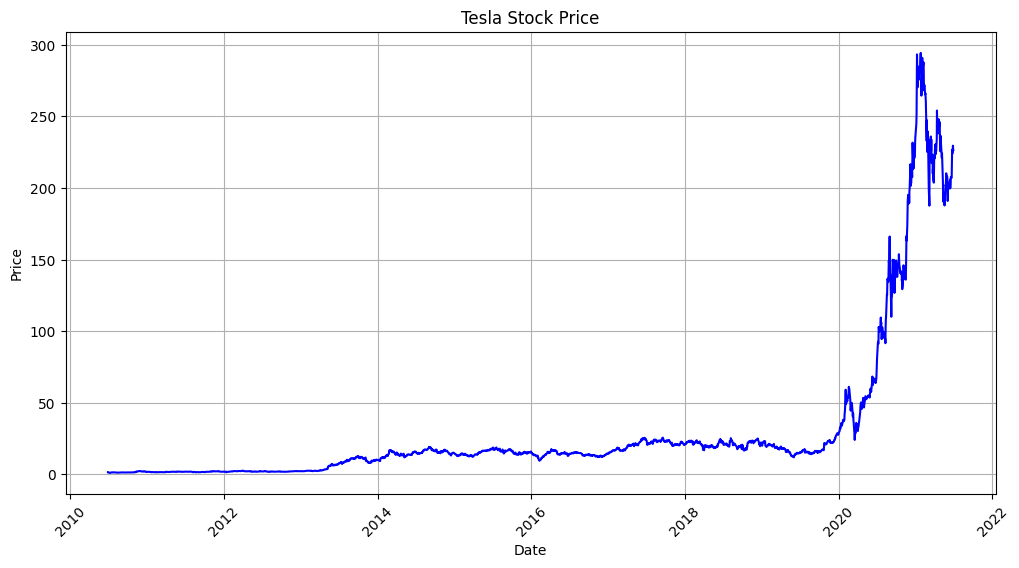

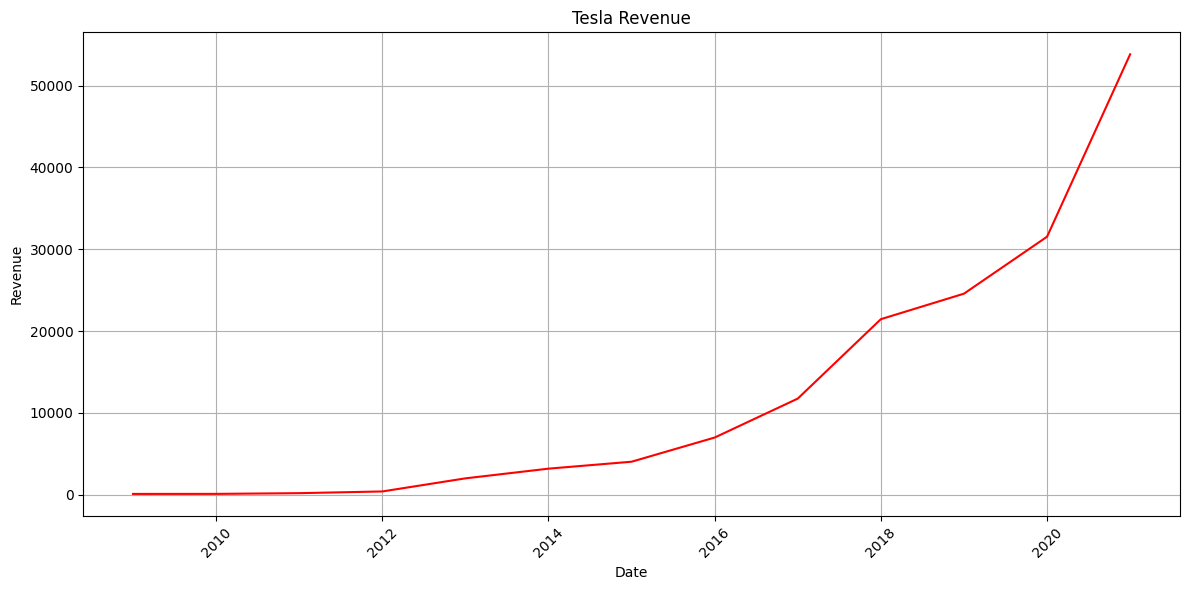

In [25]:
def make_graph(tesla_data, tesla_revenue, Tesla):
    plt.figure(figsize=(12, 6))
    plt.plot(tesla_data['Date'], tesla_data['Close'], linestyle='-', color='b')
    plt.title(f'{Tesla} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], linestyle='-', color='r')
    plt.title(f'{Tesla} Revenue')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


filter = tesla_data[tesla_data['Date'] <= '2021-06-30']
make_graph(filter, tesla_revenue, 'Tesla')

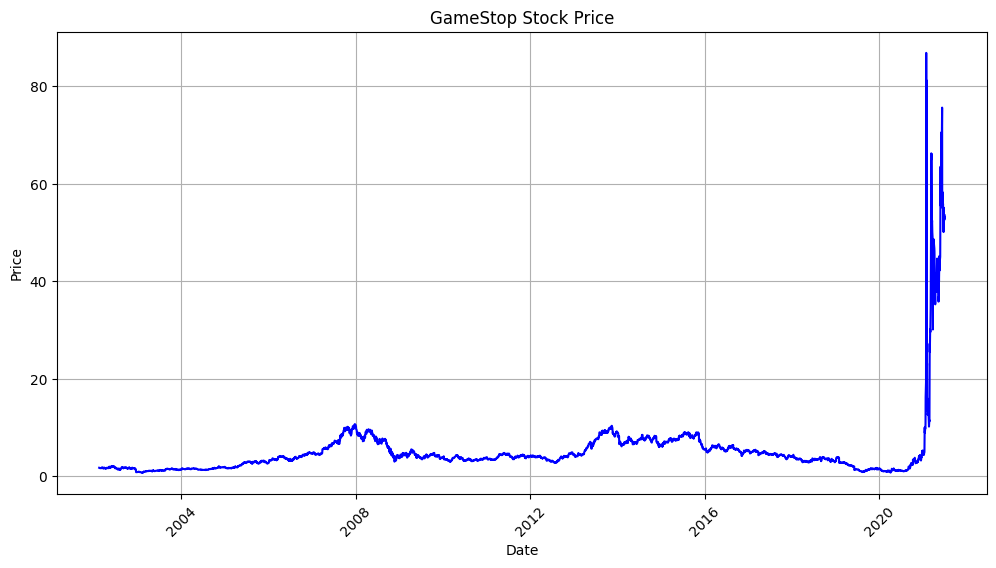

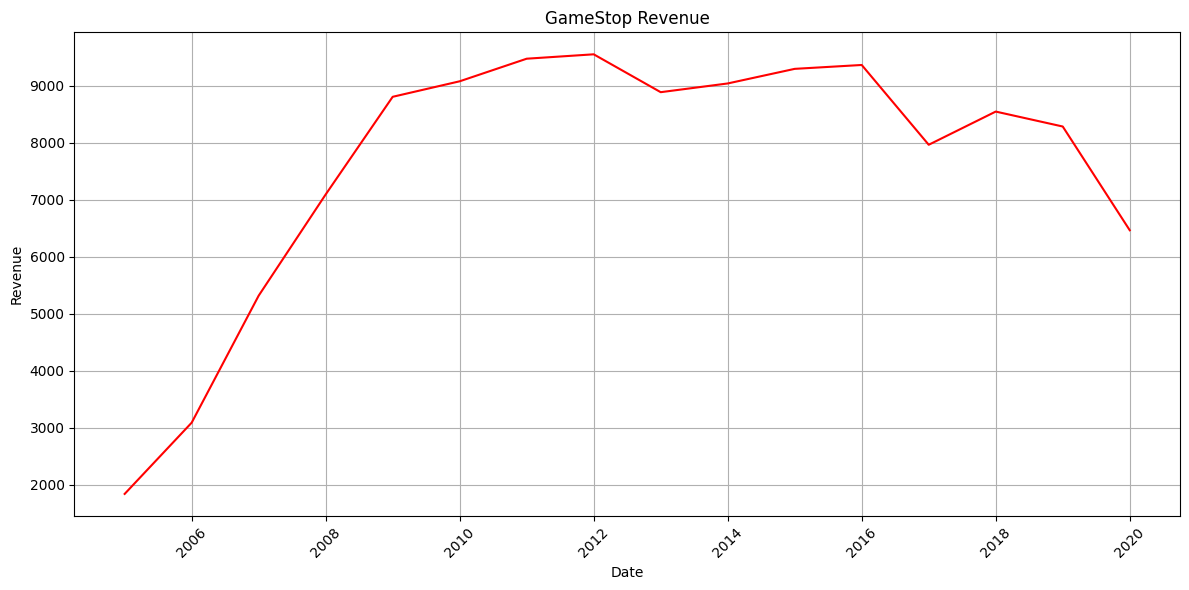

In [26]:
def make_graph(gme_data, gamestop_revenue, GameStop):
    plt.figure(figsize=(12, 6))
    plt.plot(gme_data['Date'], gme_data['Close'], linestyle='-', color='b')
    plt.title(f'{GameStop} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    plt.figure(figsize=(12, 6))
    plt.plot(gamestop_revenue['Date'], gamestop_revenue['Revenue'], linestyle='-', color='r')
    plt.title(f'{GameStop} Revenue')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


filter2 = gme_data[gme_data['Date'] <= '2021-06-30']
make_graph(filter2, gamestop_revenue, 'GameStop')